# Community Keyword Extractor

## Import Libraries

In [21]:
!pip install keybert

In [22]:
!pip install tqdm

In [23]:
import pickle
import re
import numpy as np
import pandas as pd
import spacy
import keybert
from collections import defaultdict, Counter
from keybert import KeyBERT
from tqdm import tqdm, tqdm_pandas

## 1000 data

In [4]:
with open('nodes_subreddit_1000.csv', 'rb') as file:
    data = pd.read_csv(file)
print(data.shape)
data.head()

(654, 3)


,subreddit,subreddit_feat1,words
0,gaming,1,"**If your submission does not appear, do not d..."
1,psychology,3,###We now have user flair! Please message the ...
2,DIY,6,[](#/RES_SR_Config/NightModeCompatible)\n\n> #...
3,Justrolledintotheshop,8,For those absolutely stupid things that you se...
4,tattoos,6,"# Hey there, welcome to /r/tattoos. Please re..."


In [5]:
kw_model = KeyBERT()
progress_bar = tqdm.pandas()

In [48]:
def community_keyword_extractor_diversed(words):
    '''extract community keyword using KeyBERT'''
    keyword_scores = kw_model.extract_keywords(words, keyphrase_ngram_range=(1, 1), stop_words='english',
                                         use_maxsum=True, nr_candidates=10, top_n=5)

    return '|'.join([kw for kw, score in keyword_scores])

In [49]:
data['genre'] = data['words'].progress_apply(lambda x: community_keyword_extractor_diversed(x))
data

100%|██████████| 654/654 [04:22<00:00,  2.49it/s]


,subreddit,subreddit_feat1,words,genre
0,gaming,1,"**If your submission does not appear, do not d...",ban|content|moderators|removed|submit
1,psychology,3,###We now have user flair! Please message the ...,psychopharmacology|research|behavioralmedicine...
2,DIY,6,[](#/RES_SR_Config/NightModeCompatible)\n\n> #...,chat|im_the_blondihacks_home_shop_machinist_yo...
3,Justrolledintotheshop,8,For those absolutely stupid things that you se...,automotivetraining|submissions|troubleshooting...
4,tattoos,6,"# Hey there, welcome to /r/tattoos. Please re...",artists|emojis|guidelines|ive_got_a_bit_of_a_r...
5,3DS,1,###[Mario & Luigi: Bowser's Inside Story + Bow...,gamefaqs|nintendoswitch|luigi|23r3ds|3dsdeals
6,bestof,8,#This subreddit features the very best comment...,newreddits|guidelines|removed|restrict_sr|best...
7,Foodforthought,2,# Intelligent and thought-provoking commentari...,reddit|intellectual|editorialize|ban|discourse
8,4chan,2,----\n\n##Community: \n\n**Posts:** /[new](ht...,week|4chanexploitables|month|www|gilded
9,Art,3,**Welcome to /r/art!** *This is a community of...,whatisthispainting|title|artstore|share_your_a...


In [18]:
def community_keyword_extractor(words):
    '''extract community keyword using KeyBERT'''
    keyword_scores = kw_model.extract_keywords(words, keyphrase_ngram_range=(1, 1), stop_words='english', top_n=5)
    return '|'.join([kw for kw, score in keyword_scores])

In [19]:
data['genre'] = data['words'].progress_apply(lambda x: community_keyword_extractor(x))
data

100%|██████████| 654/654 [04:22<00:00,  2.49it/s]


,subreddit,subreddit_feat1,words,genre
0,gaming,1,"**If your submission does not appear, do not d...",submissions|submit|submission|moderator|removed
1,psychology,3,###We now have user flair! Please message the ...,psychological_surveysresearch_thread|psycholog...
2,DIY,6,[](#/RES_SR_Config/NightModeCompatible)\n\n> #...,covid19_diy_ppe_partnership_announcement|disco...
3,Justrolledintotheshop,8,For those absolutely stupid things that you se...,posting|automotive|vehicles|shitty_car_mods|posts
4,tattoos,6,"# Hey there, welcome to /r/tattoos. Please re...",tattoos|tattoo|reddit_didnt_seem_to_like_the_l...
5,3DS,1,###[Mario & Luigi: Bowser's Inside Story + Bow...,3ds|3dsgamenight|3dsdeals|nintendo|23r3ds
6,bestof,8,#This subreddit features the very best comment...,bestofredditorupdates|restrict_sr|disallowed|s...
7,Foodforthought,2,# Intelligent and thought-provoking commentari...,discourse|blogs|debate|politicised|discussion
8,4chan,2,----\n\n##Community: \n\n**Posts:** /[new](ht...,gilded|4chancopypasta|classic4chan|r4chanmeta|www
9,Art,3,**Welcome to /r/art!** *This is a community of...,artwork|dude_wheres_my_art|artists|artist|art


In [20]:
data.to_csv('nodes_subreddit_1000_keywords.csv', index=False)

## 10K data

In [7]:
with open('nodes_subreddit_10K.csv', 'rb') as file:
    data = pd.read_csv(file)
print(data.shape)
data.head()

(3399, 2)


,subreddit,words
0,news,>* **[/r/worldnews](/r/worldnews?hl)**\n\n>#\n...
1,Liberal,**Welcome to /r/Liberal!**\n\n**Submission Gui...
2,interestingasfuck,---\n\nA place to share (almost) anything and ...
3,skeptic,## [Click this link to Read the Rules](http://...
4,rpg,>[Wiki](https://www.reddit.com/r/rpg/wiki) \n...


In [8]:
kw_model = KeyBERT()
progress_bar = tqdm.pandas()

In [9]:
def community_keyword_extractor_10k(words):
    '''extract community keyword using KeyBERT'''
    keyword_scores = kw_model.extract_keywords(words, keyphrase_ngram_range=(1, 1), stop_words='english', top_n=5)
    return '|'.join([kw for kw, score in keyword_scores])

In [11]:
data['genre'] = data['words'].progress_apply(lambda x: community_keyword_extractor_10k(x))
data

100%|██████████| 3399/3399 [23:03<00:00,  2.46it/s]


,subreddit,words,genre
0,news,>* **[/r/worldnews](/r/worldnews?hl)**\n\n>#\n...,spam|rules|worldnews|banned|violates
1,Liberal,**Welcome to /r/Liberal!**\n\n**Submission Gui...,petitions|promote|liberal|subs|submit
2,interestingasfuck,---\n\nA place to share (almost) anything and ...,content|blogs|blog|rules_of_the_subreddit_if_t...
3,skeptic,## [Click this link to Read the Rules](http://...,skepticsinthepub|skeptic|subreddit|moderator|s...
4,rpg,>[Wiki](https://www.reddit.com/r/rpg/wiki) \n...,rpgs|rpg_gamers|beginnersguide|rpg|rpgonline
5,hiphopheads,###Welcome to \/r\/HipHopHeads!\n\n\n##**[/r/H...,rhiphopheads_covid19_donations_thread|wiki_can...
6,AskTrumpSupporters,#ATS is not a typical subreddit!\n#####Read th...,mod_rules|moderators|asktrumpsupporters|mods|v...
7,aww,# Welcome to /r/aww!\n\n> Things that make you...,animaltextgifs|content|awwwsuboftheweek|pets|nsfw
8,gifs,"Links to amusing, interesting, or funny GIFs f...",interestinggifs|gifs|2fgifs|spacegifs|rgifs_ru...
9,nyc,### Welcome!\n\n#[](#See /r/DiscordWidget for ...,discordwidget|discord|discordapp|nycjam|newyor...


In [12]:
data.to_csv('nodes_subreddit_10K_keywords.csv', index=False)

## 50K data

In [24]:
with open('nodes_subreddit_50K.csv', 'rb') as file:
    data = pd.read_csv(file)
print(data.shape)
data.head()

(8752, 2)


,subreddit,words
0,ethereum,"---\n\n## Welcome to r/Ethereum, the front pag..."
1,batman,[](https://www.reddit.com/r/batman/comments/zc...
2,wowthissubexists,We are here for the subreddits you find while ...
3,RocketLeagueExchange,**Use Creator Code: RLExchange #EpicPartner**\...
4,EatCheapAndHealthy,> Trending Topics: | [We're in the top 200 su...


In [25]:
kw_model = KeyBERT()
progress_bar = tqdm.pandas()

In [26]:
def community_keyword_extractor_50k(words):
    '''extract community keyword using KeyBERT'''
    keyword_scores = kw_model.extract_keywords(words, keyphrase_ngram_range=(1, 1), stop_words='english', top_n=5)
    return '|'.join([kw for kw, score in keyword_scores])

In [27]:
data['genre'] = data['words'].progress_apply(lambda x: community_keyword_extractor_50k(x))
data

100%|██████████| 8752/8752 [57:32<00:00,  2.54it/s]  


,subreddit,words,genre
0,ethereum,"---\n\n## Welcome to r/Ethereum, the front pag...",ethereum|spamming|blog|welcome_to_rethereum_th...
1,batman,[](https://www.reddit.com/r/batman/comments/zc...,a_discussion_about_black_lives_matter|wiki_wee...
2,wowthissubexists,We are here for the subreddits you find while ...,sub|subredditoftheday|subreddit|promotion|subr...
3,RocketLeagueExchange,**Use Creator Code: RLExchange #EpicPartner**\...,message|meta_successful_tradereputation_post_1...
4,EatCheapAndHealthy,> Trending Topics: | [We're in the top 200 su...,meal_prep_a_guide|26_2021_1592_grocery_list_me...
5,SuicideWatch,"######[If you see abuse, trolling, or guidelin...",hotline_faqs|hotline|self_help_resources|hotli...
6,AskMen,> ###Community Rules:\n\n\n\n> **DON'T BE AN A...,surveys|guidelines|reddit|posts|responses
7,StardewValley,[Announcing user flair and prestige flair!](ht...,faq_and_beginner_questions_thread_september_18...
8,FoodPorn,>* [The SFW Porn Network](https://www.reddit.c...,recipes|foodhacks|recipe|foodporn|uk_food
9,de,**Für alle Deutschsprechenden. Die [Hausordnun...,eurer|cultural_exchanges|ist|ich_iel|einzuhalten


In [28]:
data.to_csv('nodes_subreddit_50K_keywords.csv', index=False)

## Generate Word Cloud

In [50]:
!pip install wordcloud

In [51]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
words = data['words'].str.cat(sep=' ')
wc = WordCloud(width = 1500, height = 800,
                background_color ='red',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(words)

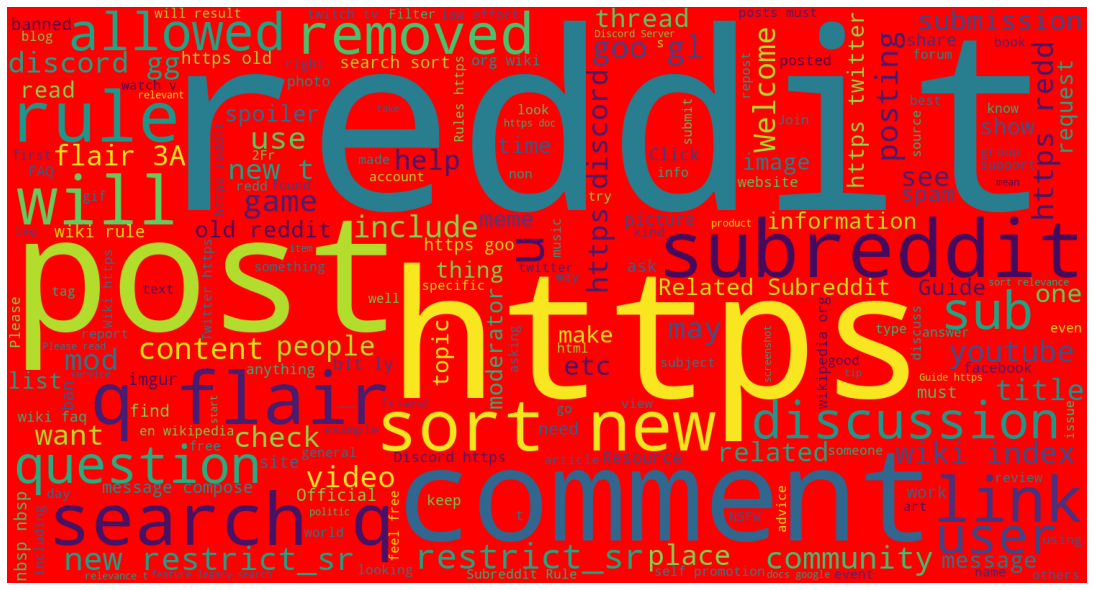

In [63]:
plt.figure(figsize = (15, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("reddit_keyword_cloud.jpg")
plt.show()

## Keep Only Top 1000 keywords

In [152]:
with open('nodes_subreddit_50K_keywords.csv', 'rb') as file:
    data = pd.read_csv(file)
print(data.shape)
data.head()

(8752, 3)


,subreddit,words,genre
0,ethereum,"---\n\n## Welcome to r/Ethereum, the front pag...",ethereum|spamming|blog|welcome_to_rethereum_th...
1,batman,[](https://www.reddit.com/r/batman/comments/zc...,a_discussion_about_black_lives_matter|wiki_wee...
2,wowthissubexists,We are here for the subreddits you find while ...,sub|subredditoftheday|subreddit|promotion|subr...
3,RocketLeagueExchange,**Use Creator Code: RLExchange #EpicPartner**\...,message|meta_successful_tradereputation_post_1...
4,EatCheapAndHealthy,> Trending Topics: | [We're in the top 200 su...,meal_prep_a_guide|26_2021_1592_grocery_list_me...


In [153]:
from collections import Counter
genre = data['genre'].str.split('|').tolist()
genre = np.hstack(genre)
most_common_1000_genres = Counter(genre).most_common(1000)

In [154]:
most_common_1000_genres = [i[0] for i in most_common_1000_genres]
most_common_1000_genres

['something_wrong_with_this_subreddit',
 'ban',
 'rules',
 'posts',
 'no_description',
 'subreddit',
 'discord',
 'spam',
 'links',
 'guidelines',
 'banned',
 'subreddits',
 'posting',
 'reddit',
 'post',
 'submissions',
 'nsfw',
 'content',
 'gifs',
 'submit',
 'spoilers',
 'sub',
 'mods',
 'youtube',
 'www',
 'blog',
 'spoiler',
 'discussions',
 'forums',
 'submission',
 'mod',
 'twitter',
 'art',
 'discussion',
 'moderation',
 'wiki',
 'videos',
 'brigading',
 'promotion',
 'pokemon',
 'reposts',
 'twitch',
 'flair',
 'nudity',
 'anime',
 'instagram',
 'moderators',
 'memes',
 'podcast',
 'porn',
 'recipes',
 'filter',
 'music',
 'blogs',
 'community',
 'imgur',
 'promote',
 'comics',
 'paintings',
 'com',
 'moderator',
 'nude',
 'pokémon',
 'titles',
 'reddiquette',
 'forum',
 'manga',
 'pictures',
 'drawings',
 'search',
 'resources',
 'photos',
 'android',
 'topics',
 'league',
 'sidebar',
 'promoting',
 'guide',
 'animals',
 'firearms',
 'subs',
 'guides',
 'facebook',
 'spammin

In [155]:
def keep_1000(x):
    try:
        kws = x.split('|')
        result = []
        for kw in kws:
            if kw not in most_common_1000_genres:
                kw = '<UNK>'
            result.append(kw)
        return '|'.join(result)
    except:
        return '<UNK>'
data['genre'] = data['genre'].progress_apply(lambda x: keep_1000(x))

100%|██████████| 8752/8752 [00:00<00:00, 22414.98it/s]


In [156]:
data

,subreddit,words,genre
0,ethereum,"---\n\n## Welcome to r/Ethereum, the front pag...",ethereum|spamming|blog|<UNK>|rules
1,batman,[](https://www.reddit.com/r/batman/comments/zc...,<UNK>|<UNK>|<UNK>|<UNK>|<UNK>
2,wowthissubexists,We are here for the subreddits you find while ...,sub|<UNK>|subreddit|promotion|subreddits
3,RocketLeagueExchange,**Use Creator Code: RLExchange #EpicPartner**\...,message|<UNK>|<UNK>|<UNK>|<UNK>
4,EatCheapAndHealthy,> Trending Topics: | [We're in the top 200 su...,<UNK>|<UNK>|<UNK>|recipes|cookingforbeginners
5,SuicideWatch,"######[If you see abuse, trolling, or guidelin...",<UNK>|<UNK>|<UNK>|<UNK>|guidelines
6,AskMen,> ###Community Rules:\n\n\n\n> **DON'T BE AN A...,surveys|guidelines|reddit|posts|responses
7,StardewValley,[Announcing user flair and prestige flair!](ht...,<UNK>|<UNK>|<UNK>|<UNK>|rpg
8,FoodPorn,>* [The SFW Porn Network](https://www.reddit.c...,recipes|<UNK>|recipe|<UNK>|<UNK>
9,de,**Für alle Deutschsprechenden. Die [Hausordnun...,<UNK>|<UNK>|<UNK>|<UNK>|<UNK>


In [157]:
data.to_csv('nodes_subreddit_50K_top_1000_keywords.csv', index=False)